![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/tarikkranda, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [1]:
# Your code here!-----Elif Beril Yılmaz

In [17]:
# Step 1 Visualize the data:

In [34]:
import pandas as pd
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('dataset.csv')
print(df.head())


   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True


In [35]:
from sklearn.impute import SimpleImputer

df = pd.read_csv('dataset.csv')

# Impute missing values using the mean value of the column
imputer = SimpleImputer(strategy='mean')
df['feature_1'] = imputer.fit_transform(df[['feature_1']]).ravel()
df['feature_2'] = imputer.fit_transform(df[['feature_2']]).ravel()
df['feature_3'] = imputer.fit_transform(df[['feature_3']]).ravel()


# Convert the data to an integer format
df['feature_1'] = df['feature_1'].astype(int)
df['feature_2'] = df['feature_2'].astype(int)
df['feature_3'] = df['feature_3'].astype(int)



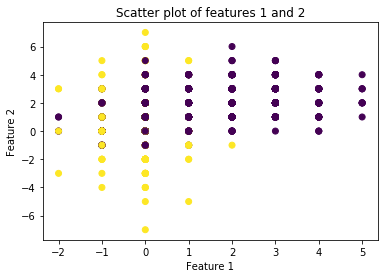

AttributeError: module 'seaborn' has no attribute 'histplot'

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of feature 1 and feature 2
plt.scatter(df['feature_1'], df['feature_2'], c=df['isVirus'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of features 1 and 2')
plt.show()

# Histogram of feature 3
sns.histplot(df['feature_3'], hue=df['isVirus'], kde=True)
plt.xlabel('Feature 3')
plt.ylabel('Count')
plt.title('Histogram of feature 3')
plt.show()


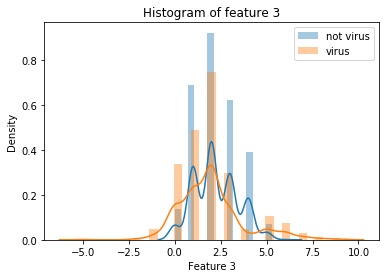

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of feature 3
sns.distplot(df['feature_3'][df['isVirus'] == 0], kde=True, label='not virus')
sns.distplot(df['feature_3'][df['isVirus'] == 1], kde=True, label='virus')
plt.xlabel('Feature 3')
plt.ylabel('Density')
plt.title('Histogram of feature 3')
plt.legend()
plt.show()


In [22]:
# Step2 Clean up the data:

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import numpy as np

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Balance the classes using oversampling
df_majority = df_imputed[df_imputed[:, -1] == 0]
df_minority = df_imputed[df_imputed[:, -1] == 1]
df_minority_upsampled = resample(df_minority, n_samples=len(df_majority), replace=True, random_state=42)
df_balanced = np.vstack((df_majority, df_minority_upsampled))

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_balanced[:, :-1])
y = df_balanced[:, -1]


In [26]:
# Step 3 Visualize the cleaned data:

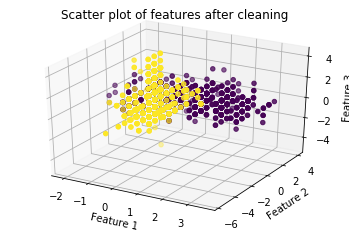

In [27]:
# 4D scatter plot of features after cleaning
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Scatter plot of features after cleaning')
plt.show()


In [28]:
#Step 4 Create a simple model:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model on testing data
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:', confusion)


Accuracy: 0.7279549718574109
Confusion matrix: [[155 114]
 [ 31 233]]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
